# <div align="Center"><u>Customer Segmentation (Credit Card Clustring) </u>
    

Author- <u> Shwetank Dixit</u> <br>
You can follow me on linkedin and github for more content like this. Link is given below catch me up there (: <br>
[My linkedIn Profile](https://www.linkedin.com/in/shwetank-dixit-132426190/)<br>
[My github Profile](https://github.com/Shwetank2101)

<u><b> Objective</b> </u> <br>
Our projects help to divides costumers into groups based on similar characteristics. This is useful for companies to strategies there polices.<br><br>
<u><b> Methodlogy used</b></u><br>
Clustering is an Unsupervised Learning methodology, which is useful here to develop customer segmentation analysis. We used k means algorithm.
KMeans requires the number of clusters to be specified and clusters data by trying to separate samples in n groups of equal variance, minimizing inertia.<br><br>
<u><b> Resources</b></u><br>
We have taken our dataset from kaggle [Dataset](https://www.kaggle.com/arjunbhasin2013/ccdata/)<br><br>
<u><b> Content Covered </b></u>
1. Data Exploration
2. Data Cleaning
3. Data Visualization
4. Clustering
5. Conclusion


## <u><b> Initial Setup</b></u>
Installed pakages are :<br>
<b>Pandas</b>      : Used for handling data<br>
<b>Numpy</b>       : Used to perform a number of mathematical operations<br>
<b>Matplotlib </b> : It provides an object-oriented API for embedding plots <br>
<b>Seaborn</b>     : It provides a high-level interface for drawing attractive and informative statistical graphics<br> 
<b>Sklearn</b>     : Used for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.<br>  <b>Scipy</b>       : SciPy is a library that uses NumPy for more mathematical functions<br>    

In [41]:
# Installment of pakages

import pandas as pd
import numpy as np 


import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

import warnings
warnings.filterwarnings("ignore") 

## <u>Importing Data</u>

In [2]:
# Importing data using read_csv 
data=pd.read_csv(r'dataset.csv')

# <u><b>Data Exploration</b></u>

## <u>Describing Data</u>

In [3]:
#Top 5 rows
data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
#Last 5 rows
data.tail(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
#Column names
print('Columns in dataset :')
for i,j in enumerate(data.columns):
    print(str(i+1)+'.',j)

Columns in dataset :
1. CUST_ID
2. BALANCE
3. BALANCE_FREQUENCY
4. PURCHASES
5. ONEOFF_PURCHASES
6. INSTALLMENTS_PURCHASES
7. CASH_ADVANCE
8. PURCHASES_FREQUENCY
9. ONEOFF_PURCHASES_FREQUENCY
10. PURCHASES_INSTALLMENTS_FREQUENCY
11. CASH_ADVANCE_FREQUENCY
12. CASH_ADVANCE_TRX
13. PURCHASES_TRX
14. CREDIT_LIMIT
15. PAYMENTS
16. MINIMUM_PAYMENTS
17. PRC_FULL_PAYMENT
18. TENURE


## <u>Explaining column attributes</u>

**CUST_ID :** Identification of Credit Card holder (Categorical)

**BALANCE :** Balance amount left in their account to make purchases (

**BALANCE_FREQUENCY :** How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

**PURCHASES :** Amount of purchases made from account

**ONEOFF_PURCHASES :** Maximum purchase amount done in one-go

**INSTALLMENTS_PURCHASES :** Amount of purchase done in installment

**CASH_ADVANCE :** Cash in advance given by the user

**PURCHASES_FREQUENCY :** How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

**ONEOFFPURCHASESFREQUENCY :** How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASESINSTALLMENTSFREQUENCY :** How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

**CASHADVANCEFREQUENCY :** How frequently the cash in advance being paid

**CASHADVANCETRX :** Number of Transactions made with "Cash in Advanced"

**PURCHASES_TRX :** Numbe of purchase transactions made

**CREDIT_LIMIT :** Limit of Credit Card for user

**PAYMENTS :** Amount of Payment done by user

**MINIMUM_PAYMENTS :** Minimum amount of payments made by user

**PRCFULLPAYMENT :** Percent of full payment paid by user

**TENURE :** Tenure of credit card service for user

**The credit card data has 17 attributes for each customer which include the balance (credit owed by the customer), cash advance (when a customer withdraws cash using the credit card), the customer’s credit limit, minimum payment, percentage of full payments and tenure.**


In [6]:
#Data Size
data.size

161100

In [7]:
#Shape of dataset
rows,column=data.shape
print('Rows are {0} \nColumns are {1}'.format(rows,column))

Rows are 8950 
Columns are 18


In [8]:
#Data Description
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
#Information about data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
#Types of datatype in our dataframes
data.dtypes.value_counts()

float64    14
int64       3
object      1
dtype: int64

In [11]:
#Count number of values of each attributes
data.count()

CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8949
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64

In [12]:
#Count number of unique values for particular attributes
data.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

# <u>Data Cleaning<u>

## <u>Updating index with Customer id</u>

In [13]:
#Updating index with customer id
data.set_index('CUST_ID',inplace=True)

In [14]:
#Cheking index if updated
index=data.index
print(*index[:100],'continue ...')

C10001 C10002 C10003 C10004 C10005 C10006 C10007 C10008 C10009 C10010 C10011 C10012 C10013 C10014 C10015 C10016 C10017 C10018 C10019 C10020 C10021 C10022 C10023 C10024 C10025 C10026 C10027 C10028 C10029 C10030 C10031 C10032 C10033 C10034 C10035 C10036 C10037 C10038 C10039 C10040 C10041 C10043 C10044 C10045 C10046 C10047 C10048 C10049 C10050 C10051 C10052 C10053 C10054 C10055 C10056 C10057 C10058 C10059 C10060 C10061 C10062 C10063 C10064 C10065 C10067 C10068 C10069 C10070 C10071 C10072 C10073 C10074 C10075 C10077 C10078 C10079 C10080 C10081 C10082 C10083 C10084 C10085 C10086 C10087 C10088 C10089 C10090 C10092 C10093 C10094 C10095 C10096 C10097 C10098 C10099 C10100 C10101 C10102 C10103 C10104 continue ...


## <u>Check Missing value for each column<u>

In [15]:
#Cheking na for each column
data.isna().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
BALANCE                               0
dtype: int64

There are total <b><u>313</u></b> na values in minimum payments and <b><u>1</u></b> in credit limit. 
So we will remove na with their <b><u>mean values</u></b>

## <u>Updating rows with missing values<u>

In [16]:
#Filling na values with mean values
data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.mean(),inplace=True) 
data.CREDIT_LIMIT.fillna(data.CREDIT_LIMIT.mean(),inplace=True) 

In [17]:
#Checking na values if it updated or not
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## <u>Checking For Duplicate Values<u>

In [18]:
#printing duplicate rows
duplicate=(data.duplicated())
data[duplicate].count()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [19]:
data[duplicate].shape

(0, 17)

In [20]:
data.drop_duplicates(inplace=True)

There is <u>no duplicate value</u>

In [21]:
#New shape of data
data.shape

(8950, 17)

In [22]:
data.size

152150

# <u><b>Data Visualization</b></u>

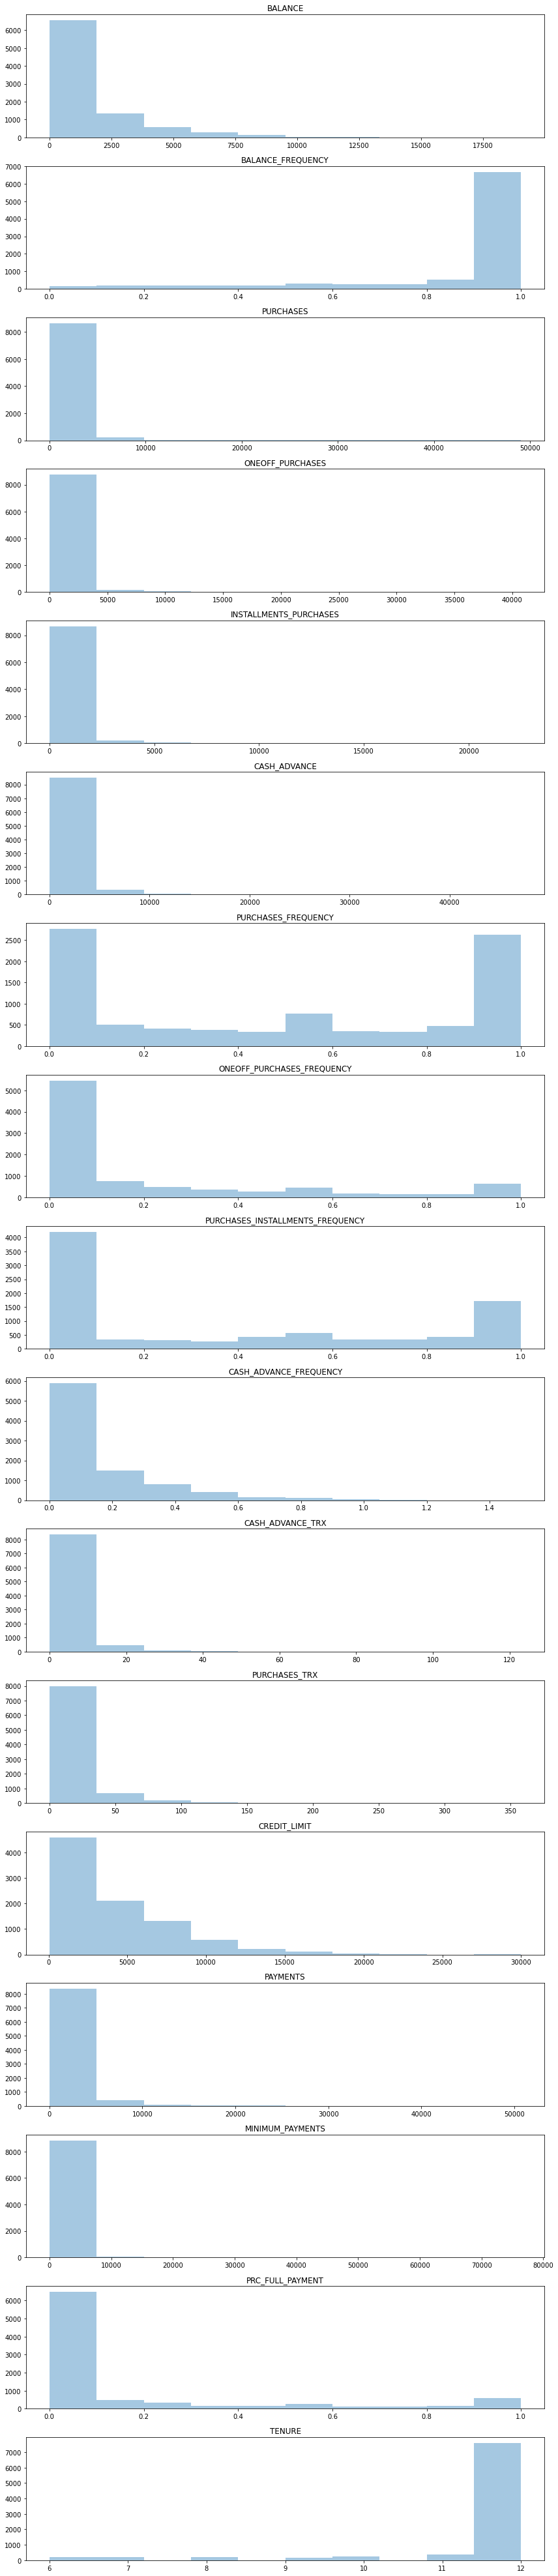

In [23]:
columns = data.columns 
plt.figure(figsize=(12,55))
for i, column in enumerate(columns): 
    plt.subplot(len(columns), 1, i+1)
    plt.hist(data[column], alpha=.4, )
    plt.title(column)
    
plt.tight_layout()

Histogram tells us that how our data is distrubuted 

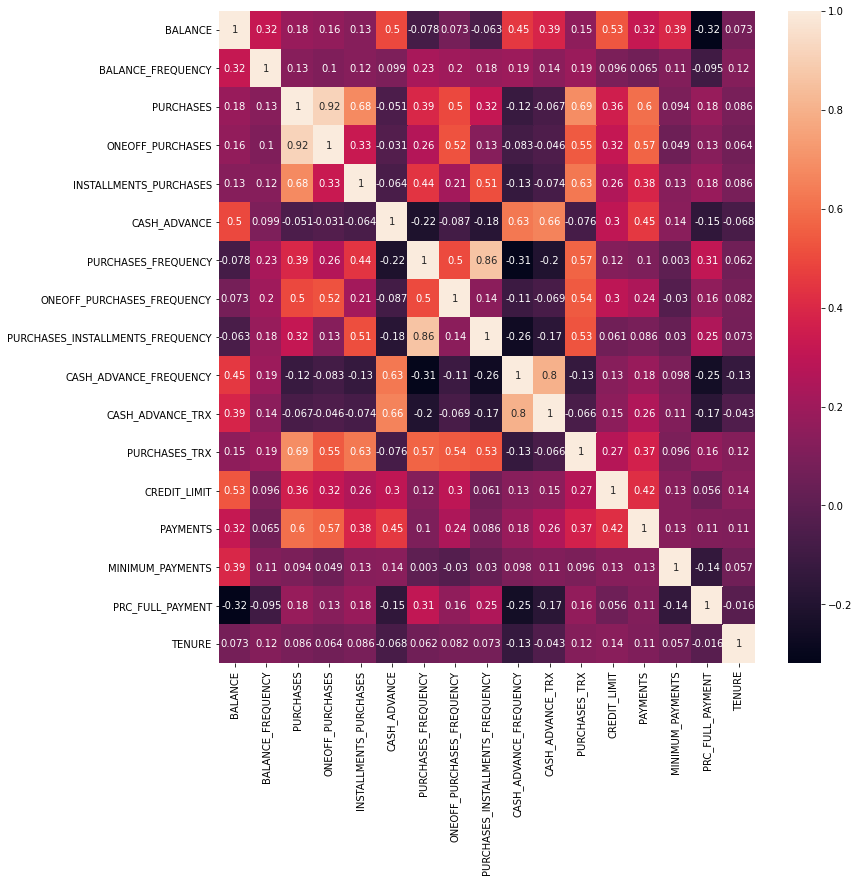

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)

Payments attribute has a high positive correletion with Purchases and one off Purchases. Balance has a high positive correlation with Cash Advance, Cash Advance Frequency and Credit Limit. Tenure has a negative correlation with Cash Advance and Cash Advance Frequency variables.

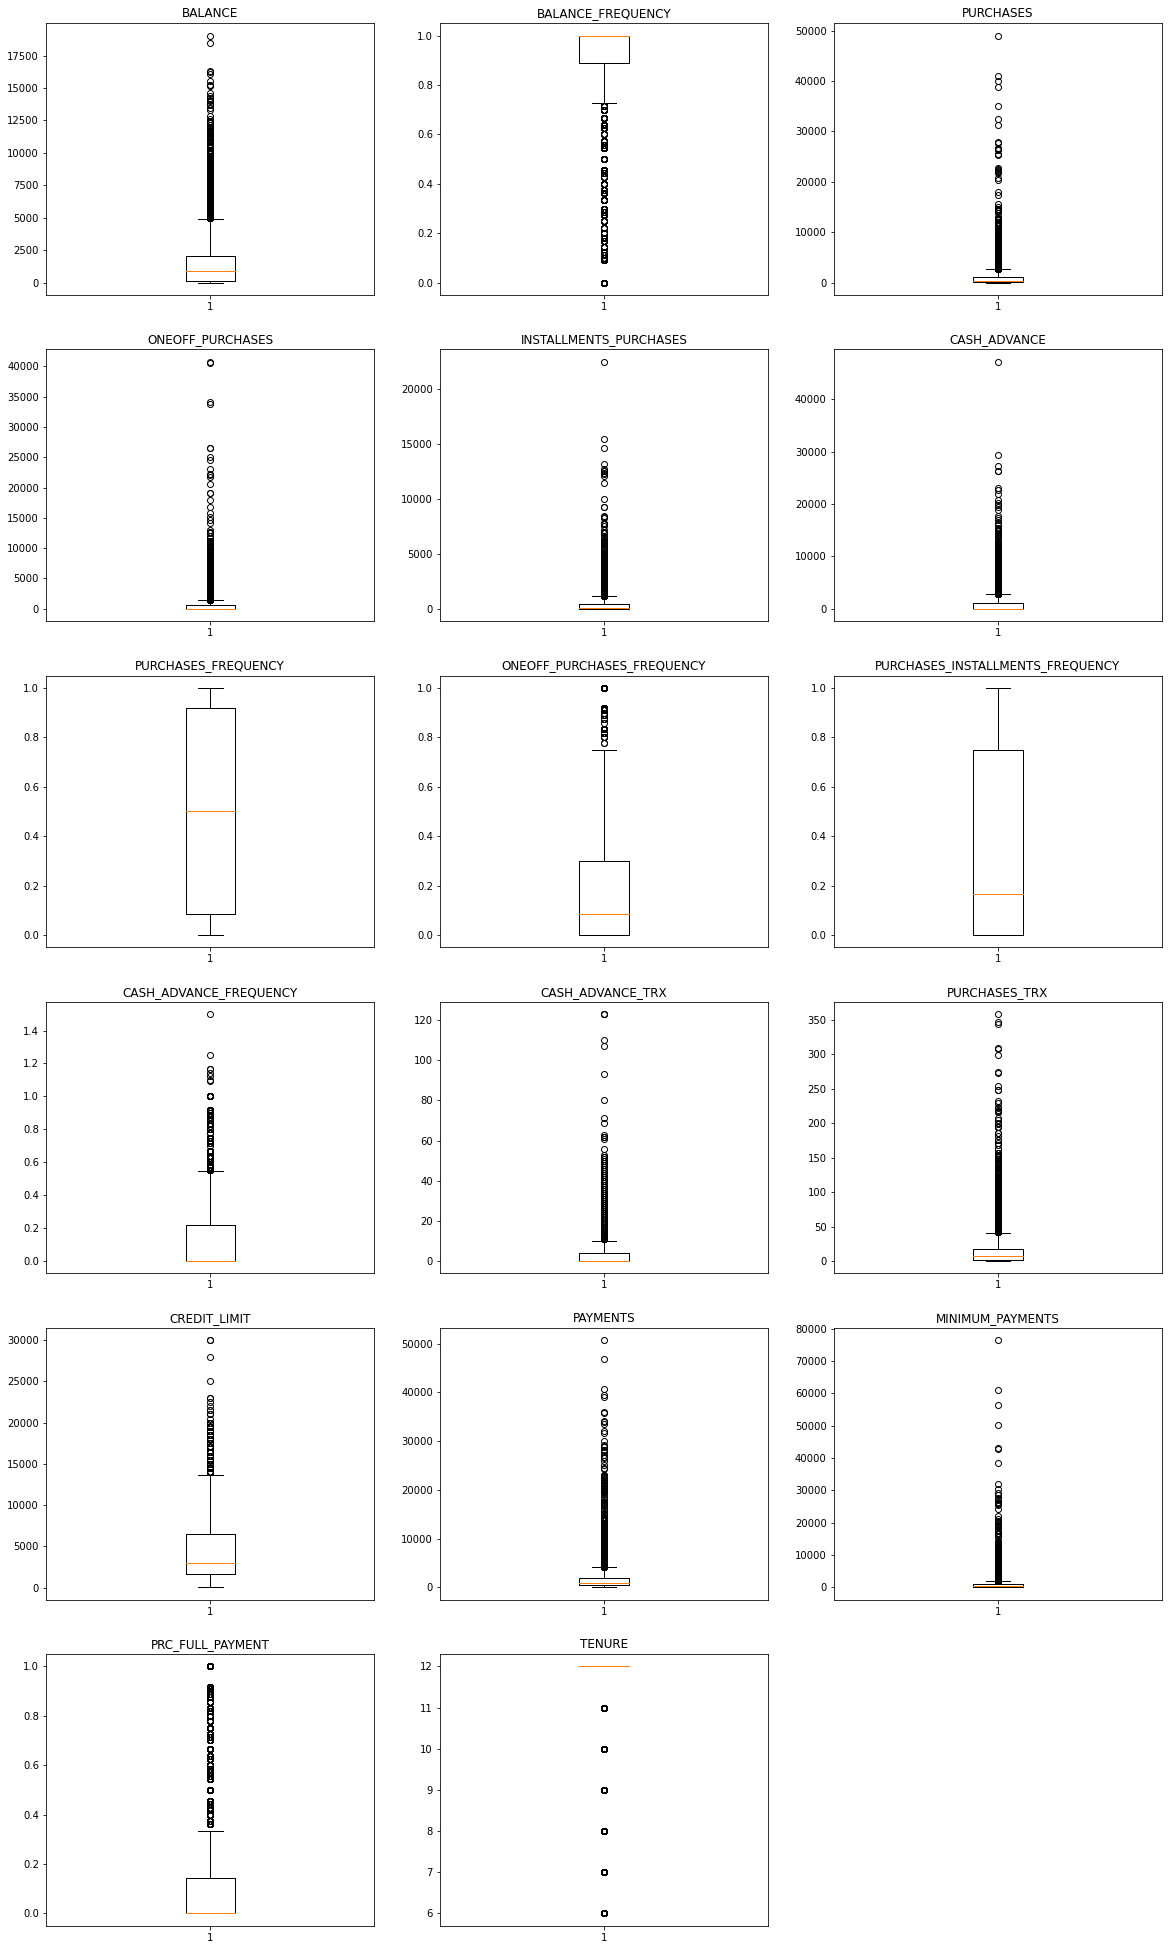

In [25]:
plt.figure(figsize=(20,35))
column=data.columns
for i in range(0,17):
    plt.subplot(6, 3, i+1)
    plt.boxplot(data[column[i]].dropna())
    plt.title(column[i])

We will not remove outliers as we want to make a cluster which will cover outliers 

# <u><b> Clustering</b></u>

<u>Clustering</u> is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.<br>
<u>For ex</u>- The data points in the graph below clustered together can be classified into one single group. We can distinguish the clusters, and we can identify that there are 3 clusters in the below picture.
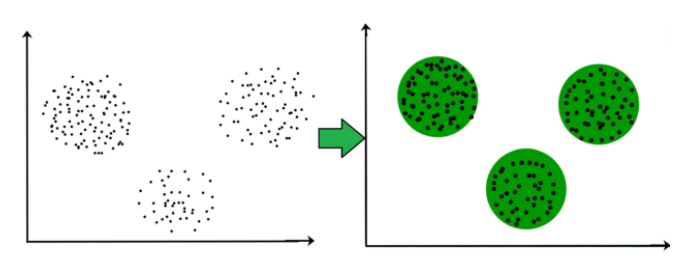

## <u>K means Clustering<u/>
K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.<br>
    <u>The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.</u>

### <u>Standardizing</u>

Standardizing the feature as it is not convinient to have features at different scale.

In [60]:
scaler = StandardScaler()
datan=normalize(data)
creditcard_scaled = scaler.fit_transform(datan)

### <u>Elbow Method</u>
In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

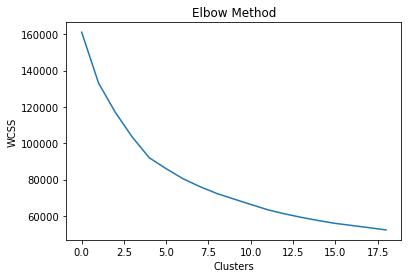

In [70]:
inertiaValue = []

for i in range(1,20):
    model = KMeans( n_clusters = i )
    model.fit(creditcard_scaled)
    inertiaValue.append(model.inertia_)
    
plt.plot(inertiaValue)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Here we see that elbow of curve is formed at 4 and 7

### <u>Silhouette analysis</u>

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

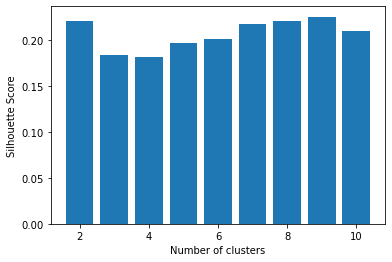

In [71]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(creditcard_scaled, KMeans(n_clusters = n_cluster).fit_predict(creditcard_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [50]:
kmeans_values=[]

for cluster in range(2,20):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(creditcard_scaled)
    sil_score = metrics.silhouette_score(creditcard_scaled,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster is {:.4f}".format(cluster,
                                                               metrics.silhouette_score(creditcard_scaled, kmeans, metric='euclidean')))
    kmeans_values.append((cluster,sil_score))

Silhouette score for 2 cluster is 0.2463
Silhouette score for 3 cluster is 0.1883
Silhouette score for 4 cluster is 0.1841
Silhouette score for 5 cluster is 0.1876
Silhouette score for 6 cluster is 0.1981
Silhouette score for 7 cluster is 0.2038
Silhouette score for 8 cluster is 0.2053
Silhouette score for 9 cluster is 0.2104
Silhouette score for 10 cluster is 0.2097
Silhouette score for 11 cluster is 0.2057
Silhouette score for 12 cluster is 0.2100
Silhouette score for 13 cluster is 0.2052
Silhouette score for 14 cluster is 0.1927
Silhouette score for 15 cluster is 0.1976
Silhouette score for 16 cluster is 0.1826
Silhouette score for 17 cluster is 0.1822
Silhouette score for 18 cluster is 0.1813
Silhouette score for 19 cluster is 0.1825


Here we se that score is maximum at 7,8 and 9 so <u><b>We used 7 as our number of clusters</b></u>

### <u>Applying K-Means</u>

In [51]:
kmeans = KMeans(7)
kmeans.fit(creditcard_scaled)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_scaled)

In [52]:
data['cluster']=labels
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


### <u>Principal Component Analysis</u>

PCA is a dimensional reduction technique which is used to reduce the dimension to vizualize different cluster

First we use <b><u>2 dimensional PCA then with 3 dimensional PCA</u></b>
### <u>PCA with 2 dimension</u>

In [ ]:
# PCA 2 dimension
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_scaled)
pca_df = pd.DataFrame(data = principal_comp, columns =['PCA 1','PCA 2'])
pca_df['Cluster'] = labels  
pca_df.head()

Text(0.5, 1.0, 'Principal Component Analysis (PCA) by Cluster')

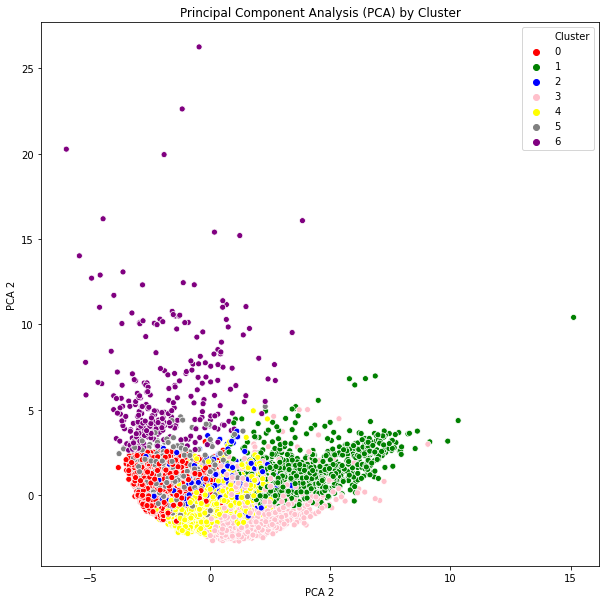

In [75]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="PCA 1", y="PCA 2", hue = "Cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.xlabel('PCA 1')
plt.xlabel('PCA 2')
plt.title('Principal Component Analysis (PCA) by Cluster')

### <u>PCA with 3 dimension</u>

In [56]:
# PCA 3 dimension

pca = PCA(n_components=3).fit(creditcard_scaled)

df_pca3 = pca.fit_transform(creditcard_scaled)
print("original shape:   ", creditcard_scaled.shape)
print("transformed shape:", principal_comp.shape)

original shape:    (8950, 18)
transformed shape: (8950, 2)


In [57]:
df_pca3 = pd.DataFrame(df_pca3) 
df_pca3.columns = ['A1', 'A2', 'A3']
df_pca3.head()

,A1,A2,A3
0,1.946143,2.042352,-2.045488
1,-2.471753,0.117324,0.110174
2,-0.824698,-1.460268,-0.617346
3,-1.252685,-1.597465,-0.805555
4,-0.044400,1.491744,-0.398521


In [59]:
fig = px.scatter_3d(df_pca3, x=df_pca3['A1'], y= df_pca3['A2'], z=df_pca3['A3'], color=data['cluster']) 

fig.show()

## <u>Conclusion</u>

The goal was to segment the customers in order to define a marketing strategy. <br>
<u>Seven clusters formed are distrubited as</u>

<u>  <b>Big Spenders with large Payments</b></u> - they make expensive purchases and have a credit limit that is between average and high.  This is only a small group of customers.
<br><br>  <u><b>Cash Advances with large Payments</b></u> - this group takes the most cash advances. They make large payments, but this appears to be a small group of customers.
<br><br>  <u><b>Highest Credit Limit but Frugal(economical)</b></u>  - this group doesn't make a lot of purchases. It looks like the 3rd largest group of customers.
<br><br>  <u><b>Cash Advances with Small Payments </b></u>  - this group likes taking cash advances, but make only small payments. 
<br><br>  <u><b>Small Spenders and Low Credit Limit</b></u>  - they have the smallest Balances after the Smallest Spenders, their Credit Limit is in the bottom 3 groups, the second largest group of customers.
<br><br>  <u> <b>Smallest Spenders and Lowest Credit Limit</b></u>  - this is the group with the lowest credit limit but they don't appear to buy much. Unfortunately this appears to be the largest group of customers.
<br><br>  <u><b>Highest Min Payments</b></u>  - this group has the highest minimum payments (which presumably refers to "Min Payment Due" on the monthly statement. This might be a reflection of the fact that they have the second lowest Credit Limit of the groups, so it looks like the bank has identified them as higher risk.)

